In [1]:
import pandas as pd

# Load dataset
file_path = "/content/insurance_claims.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         

In [2]:
import numpy as np

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Check for missing values
print(df.isnull().sum())


months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [3]:
# Drop unnecessary columns
drop_columns = ["policy_number", "policy_bind_date", "insured_zip", "incident_location"]
df.drop(columns=drop_columns, inplace=True)

# Display the updated dataset columns
print(df.columns)


Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


In [4]:
# Convert 'fraud_reported' to binary values
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

# Verify the transformation
print(df['fraud_reported'].value_counts())


fraud_reported
0    753
1    247
Name: count, dtype: int64


In [5]:
# Define categorical columns with missing values
categorical_cols_with_nan = ['collision_type', 'property_damage', 'police_report_available']

# Fill missing values with 'Unknown'
df[categorical_cols_with_nan] = df[categorical_cols_with_nan].fillna('Unknown')

# Verify if there are still missing values
print(df[categorical_cols_with_nan].isnull().sum())


collision_type             0
property_damage            0
police_report_available    0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows after encoding
print(df.head())


   months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   
3                 256   41             0           1               2000   
4                 228   44             0           2               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  ...  witnesses  \
0                        4                   2  ...          2   
1                        4                   6  ...          0   
2       

In [7]:
# Define features (X) and target (y)
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

# Display the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (1000, 34)
Target shape: (1000,)


In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (800, 34), (800,)
Testing set shape: (200, 34), (200,)


In [ ]:
#RANDOM FOREST

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Confirm training is complete
print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [10]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Get predicted probabilities for ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Display the first few predictions
print("Sample Predictions:", y_pred[:10])


Sample Predictions: [0 0 0 0 0 0 0 0 0 0]


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.78
Precision: 0.58
Recall: 0.29
F1-score: 0.38
Confusion Matrix:
[[141  10]
 [ 35  14]]


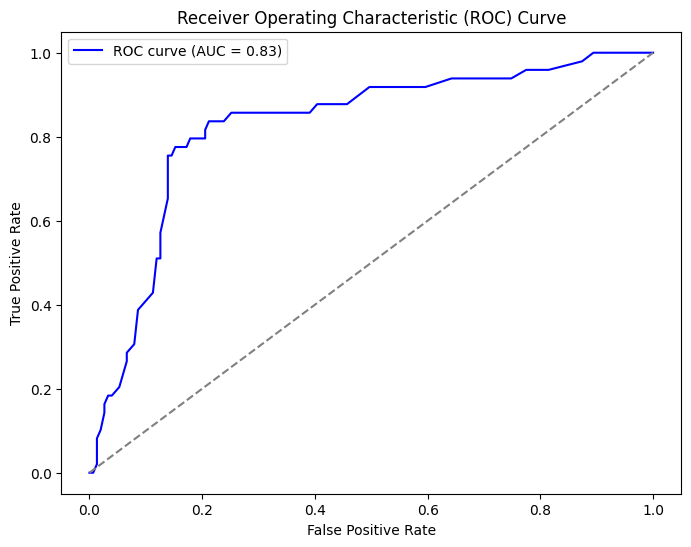

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
#  SVM

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [14]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Confirm training is complete
print("SVM model trained successfully!")


SVM model trained successfully!


In [15]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Get predicted probabilities for ROC curve
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Display the first few predictions
print("Sample Predictions:", y_pred[:10])


Sample Predictions: [0 0 0 0 0 0 0 0 0 0]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.76
Precision: 0.00
Recall: 0.00
F1-score: 0.00
Confusion Matrix:
[[151   0]
 [ 49   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


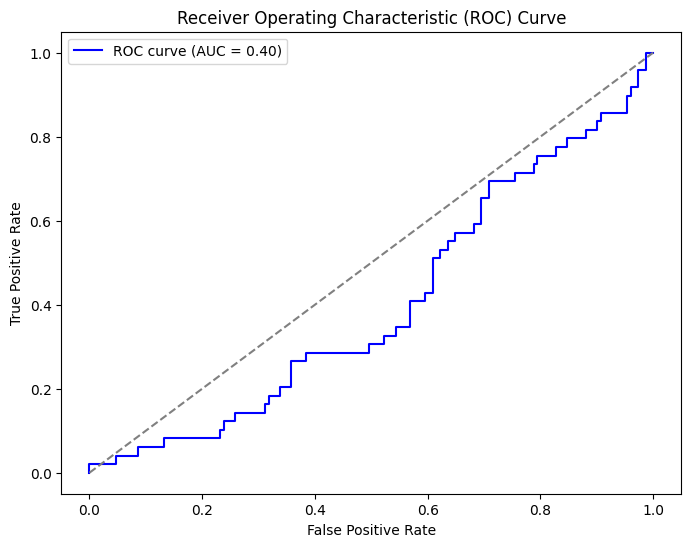

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
# LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [20]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# Confirm training is complete
print("Logistic Regression model trained successfully!")


Logistic Regression model trained successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Get predicted probabilities for ROC curve
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Display the first few predictions
print("Sample Predictions:", y_pred[:10])


Sample Predictions: [0 0 0 0 0 0 0 0 0 0]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.75
Precision: 0.00
Recall: 0.00
F1-score: 0.00
Confusion Matrix:
[[150   1]
 [ 49   0]]


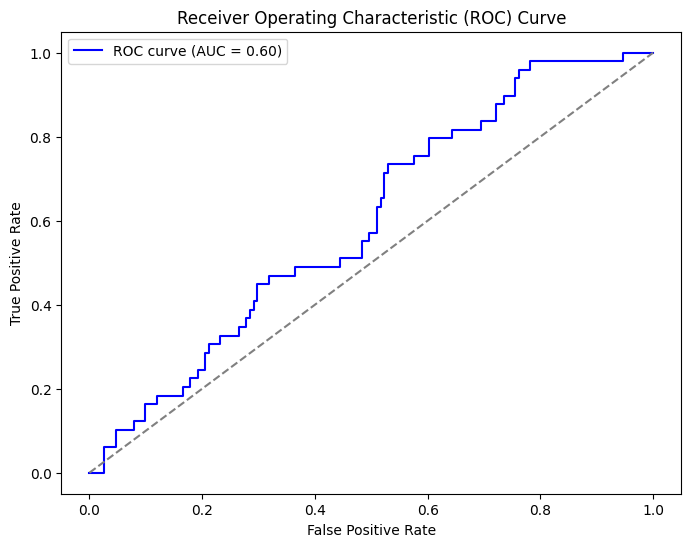

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
